<a href="https://colab.research.google.com/github/mudesir/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Mudesir_LS_DS17_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
summary_stat = []
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
sales

array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
# function for mean
def calculate_mean(arr):
  mean = arr.sum()/len(arr)
  return mean


In [92]:
#from function calculation
mean_sales = calculate_mean(sales)
print('Sales mean, : ', mean_sales)


Sales mean, :  3052.714285714286


In [49]:
# pandas builtin 
sales.mean()

3052.714285714286

In [0]:
# function for variance
def calculate_var(arr):
  x_bar = calculate_mean(arr)
  mean_dev = arr -x_bar
  mean_dev_squre =(mean_dev)**2
  variance = mean_dev_squre.sum()/(len(arr)-1)
  return variance



In [91]:
# from function calculation
var_sales = calculate_var(sales)
print('Sales variance, : ', var_sales)


Sales variance, :  214387.90476190473


In [79]:
# pandas builtin 
sales.var(ddof=1)

214387.90476190473

In [0]:
def calculate_std(arr):
  std_dev = (calculate_var(arr))**0.5
  return std_dev

In [90]:
#from function calculation
std_sales = calculate_std(sales)
print('Sales std, : ', std_sales)


Sales std, :  463.0204150595357


In [83]:
# from pandas
sales.std(ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [84]:
# dataset of custumers and sales for given
custumers = np.array([127, 80, 105, 92, 120, 115, 93])
sc_data = {'sales':sales, 'customers':custumers}
df = pd.DataFrame(sc_data)
print("Dataset\n", df)



Dataset
    sales  customers
0   3505        127
1   2400         80
2   3027        105
3   2798         92
4   3700        120
5   3250        115
6   2689         93


In [85]:
# the covariance of sales and custumers
cov_sales_cust = df.cov()
print("Covariance of sales and custumers:\n", cov_sales_cust)

Covariance of sales and custumers:
                    sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [89]:
# std of custumer
std_cust = calculate_std(custumers)
print('Custumers std: ', std_cust)


Custumers std:  17.057326313123664


In [88]:
custumers.std(ddof=1)

17.057326313123664

In [0]:
# find the correlation coefficient of sales and custumers

def calculate_corr(var1, var2):
  x_bar1 = calculate_mean(var1)
  x_bar2 = calculate_mean(var2)
  x_deviation = var1 - x_bar1
  y_deviation = var2 - x_bar2
  covariance = (x_deviation * y_deviation).sum()/(len(var1)-1)
  std1 = calculate_std(var1)
  std2 = calculate_std(var2)
  r = covariance / (std1*std2)
  return r


In [99]:
# from function calculation
corr_of_sales_cust = calculate_corr(df['sales'], df['customers'])
print('Correlation of sales and customers: ', corr_of_sales_cust)

Correlation of sales and customers:  0.9628339778148909


In [98]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


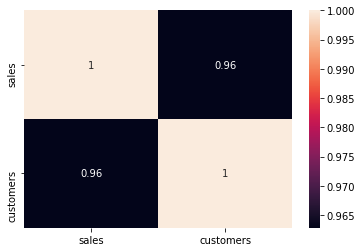

In [101]:
# plot the corelation matrix
import seaborn as sn

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [102]:
# load the data set
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [0]:
df.isnull().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
df.shape

(1310, 16)

In [0]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [105]:
# variance-covariance round to 2  decimal point
df.cov().round(2)

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.50,284.36,-53.97,-1442.94,25.83,1.17,-9410.74,591.58,-95.44
pclass,284.36,0.70,-0.13,-3.95,0.05,0.01,-24.23,-2.88,-0.25
survived,-53.97,-0.13,0.24,-0.31,-0.01,0.03,6.15,0.00,0.06
age,-1442.94,-3.95,-0.31,165.85,-2.56,-1.46,114.42,81.62,1.46
sibsp,25.83,0.05,-0.01,-2.56,1.09,0.34,8.64,-8.71,-0.00
parch,1.17,0.01,0.03,-1.46,0.34,0.75,9.93,4.24,0.01
fare,-9410.74,-24.23,6.15,114.42,8.64,9.93,2678.96,-179.16,10.98
body,591.58,-2.88,0.00,81.62,-8.71,4.24,-179.16,9544.69,3.63
has_cabin_number,-95.44,-0.25,0.06,1.46,-0.00,0.01,10.98,3.63,0.17


In [104]:
# correlation round to digit decimal point
df.corr().round(2)

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.00,0.90,-0.29,-0.30,0.07,0.00,-0.48,0.02,-0.60
pclass,0.90,1.00,-0.31,-0.37,0.06,0.02,-0.56,-0.03,-0.71
survived,-0.29,-0.31,1.00,-0.05,-0.03,0.08,0.24,NaN,0.30
age,-0.30,-0.37,-0.05,1.00,-0.19,-0.13,0.17,0.06,0.27
sibsp,0.07,0.06,-0.03,-0.19,1.00,0.37,0.16,-0.10,-0.01
parch,0.00,0.02,0.08,-0.13,0.37,1.00,0.22,0.05,0.04
fare,-0.48,-0.56,0.24,0.17,0.16,0.22,1.00,-0.04,0.51
body,0.02,-0.03,NaN,0.06,-0.10,0.05,-0.04,1.00,0.08
has_cabin_number,-0.60,-0.71,0.30,0.27,-0.01,0.04,0.51,0.08,1.00


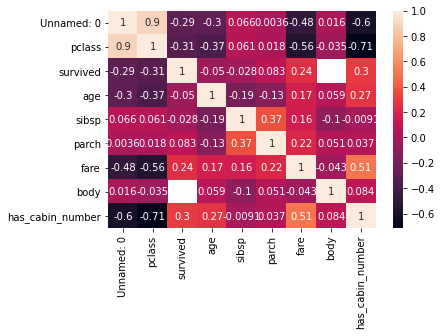

In [106]:
# plot the corelation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

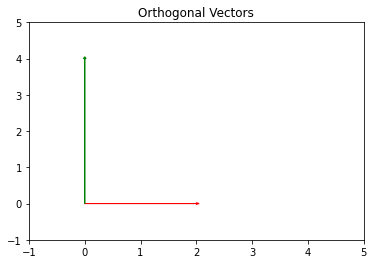

In [107]:
vec_1 = [2, 0]
vec_2 = [0, 4]

# Plot the Scaled Vectors
plt.arrow(0,0, vec_1[0], vec_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_2[0], vec_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

What is a synonym for orthogonal is unrelated or independent

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [108]:
a1 = np.array([-5,3,7]) 
b1 = np.array([6,-8,2])
a1b1_dot = np.dot(a1,b1)
print(a1b1_dot)

-40


No the two vectors are not orthogonal, as we proved it above their dot product not "0" the angle between the 2 vectors is not 90 degree a.b=abcos(tata)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [112]:
c = np.array([2,-15,6,20])

print('c: ','\n', c)


c:  
 [  2 -15   6  20]


In [114]:
magnitude_c = np.linalg.norm(c)
mag_c_sq = (magnitude_c)**2
print('||c||^2 = ', mag_c_sq)

||c||^2 =  665.0


In [116]:
c_dot =np.dot(c,c)
print('c.c = ',c_dot)

c.c =  665


In [0]:
c_tran = np.transpose(np.array([[2,-15,6,20]]))
print("c transpose: ", '\n',c_tran)

In [110]:
ctc_prod = c_tran*c
print('cT*c: ', '\n', ctc_prod)

cT*c:  
 [[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


the magnitude squre and the dot product are the same except the data type, the c-transpose and c product is a 4x4 matrix

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = \begin{bmatrix} 7 \\ 2 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + \hat{j}
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\-8 \end{bmatrix} = 2\begin{bmatrix} 1 \\0\\ 0 \end{bmatrix} + 11\begin{bmatrix} 0\\1 \\ 0 \end{bmatrix}-8\begin{bmatrix} 0\\0 \\ 1 \end{bmatrix} = 7\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [117]:
# calculate the unit vector
f = np.array([4,12,11,9,2])
f_magnitude = np.linalg.norm(f)
f_hat = (1/f_magnitude)*f
print(f_hat)
# prove unit vector
f_hat_magnitude = np.linalg.norm(f_hat)
print(f_hat_magnitude)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

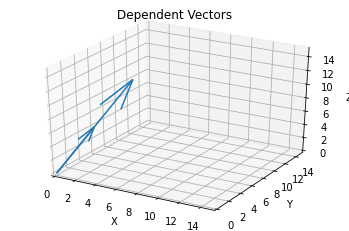

In [118]:
# Dependent vecors

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vec1 = [2, 3, 6]
vec2 = [4,6,12]

vectors = np.array([[0, 0, 0, 2, 3, 6], [0, 0, 0, 4, 6, 12],])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_zlim([0, 15])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Dependent Vectors")
plt.show()

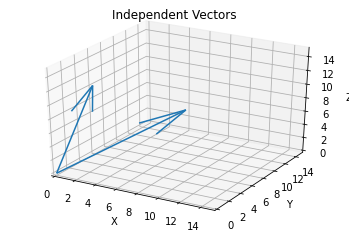

In [119]:
# Independent vectors

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vec3 = [2, 3, 12]
vec4 = [9,6,9]

vectors = np.array([[0, 0, 0, 2, 3, 12], [0, 0, 0, 9, 6, 9],])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 15])
ax.set_ylim([0, 15])
ax.set_zlim([0, 15])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [120]:
# lets check if the vectors are dependent that is their dot product is different from zero
g = np.array([1,2])
h = np.array([4,8])
gh_dot_prod = np.dot(g,h)
print(gh_dot_prod)

20


These vectors dependent they span infinte in the same line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [121]:
A = np.array([[1,2,3], [-1,0,7], [4,8,2]])
rank_A =np.linalg.matrix_rank(A)
print(rank_A)

3


The span of {l,m,n} is 3-dimentional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



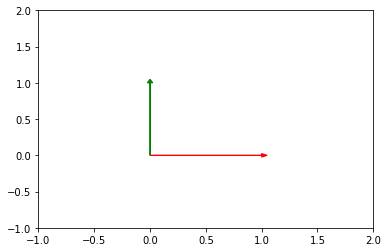

In [122]:
a=[1, 0]
b=[0, 1]
# Plot the Scaled Vectors
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.show()

## 6.2 What does it mean to form a basis?

It is to form a linearly independent vector for that space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [123]:
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
rank_P =np.linalg.matrix_rank(P)
print(rank_P)


3


It is 3

## 7.2 What does the rank of a matrix tell us?

The number of non redudentant vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

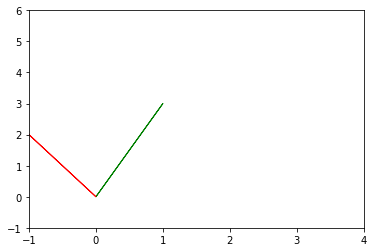

In [125]:
v = [1, 3]
w = [-1, 2]
plt.xlim(-1,4)
plt.ylim(-1, 6)
plt.arrow(0,0, v[0], v[1], color='green')
plt.arrow(0,0, w[0], w[1], color='red')
plt.show()


\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

Project vector w (red) onto the line L (blue) that is being represented by the vector v (green vector)



In [0]:
w = np.array(w)
v = np.array(v)

In [127]:
numerator = np.vdot(w,v)
numerator

5

In [128]:
denominator = np.vdot(v,v)
denominator

10

In [129]:
fraction = numerator/denominator

fraction

0.5

In [130]:
projected_point = fraction*v
projected_point

array([0.5, 1.5])

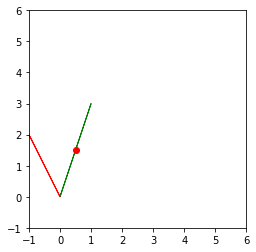

In [134]:
v = [1, 3]
w = [-1, 2]
plt.arrow(0,0, v[0], v[1], color='green')
plt.arrow(0,0, w[0], w[1], color='red')

plt.xlim(-1,6)
plt.ylim(-1, 6)

plt.plot(projected_point[0],projected_point[1],'ro') 

# fix the aspect ration of x and y axes
ax = plt.gca()
ax.set_aspect('equal')

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

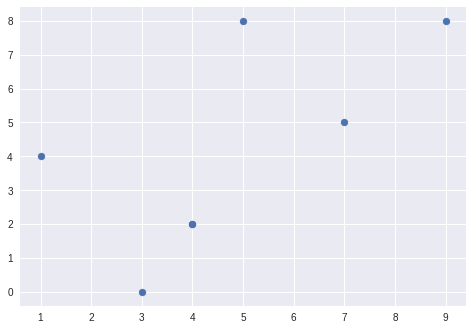

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()